___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Flavio Maximiliano Herrada Avalos</Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `flavio.herrada@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

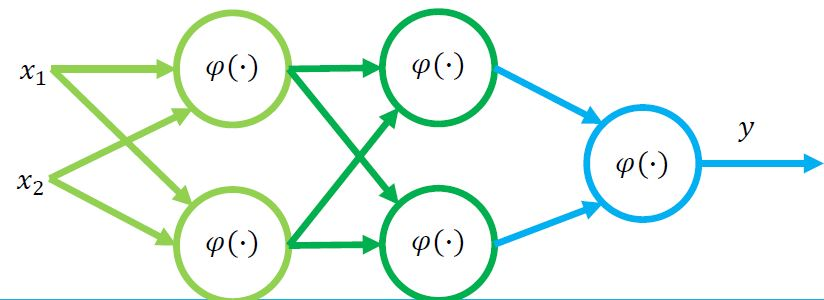

In [1]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [2]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'diabetes.csv')

In [4]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 2s 37ms/step - loss: 0.8458 - accuracy: 0.4246
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8286 - accuracy: 0.4320
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8123 - accuracy: 0.4320
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7973 - accuracy: 0.4469
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7826 - accuracy: 0.4562
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7695 - accuracy: 0.4637
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7563 - accuracy: 0.4749
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7441 - accuracy: 0.4953
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7325 - accuracy: 0.5047
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7214 - accuracy: 0.5270
Epoch 11/200
6/6 [==========

6/6 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.7858
Epoch 168/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4652 - accuracy: 0.7877
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.7858
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.7877
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.7858
Epoch 172/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.7858
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4646 - accuracy: 0.7858
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.7858
Epoch 175/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4643 - accuracy: 0.7877
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4642 - accuracy: 0.7877
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

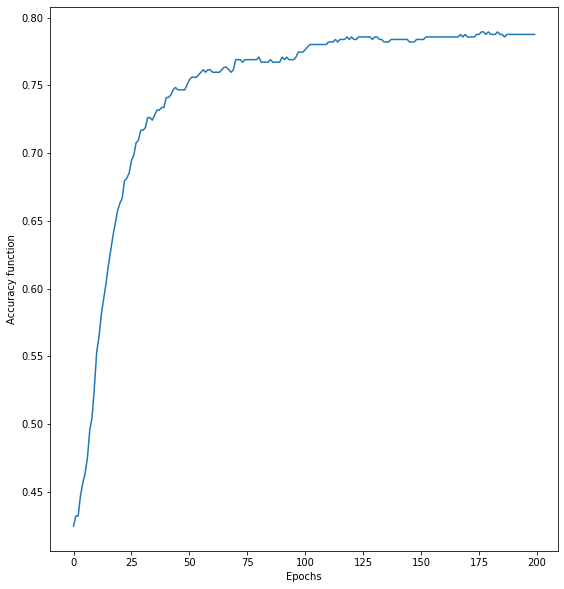

In [16]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [17]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")


8/8 [==============================] - 0s 1ms/step


In [18]:
Y_pred

array([[0.26147497],
       [0.16649938],
       [0.13849926],
       [0.22384736],
       [0.47796518],
       [0.47027946],
       [0.03199692],
       [0.5172614 ],
       [0.5987355 ],
       [0.7004244 ],
       [0.17589658],
       [0.8726944 ],
       [0.43436366],
       [0.3464544 ],
       [0.07341807],
       [0.48025674],
       [0.10199039],
       [0.06645143],
       [0.705627  ],
       [0.6345659 ],
       [0.22857626],
       [0.06293159],
       [0.29379258],
       [0.07279323],
       [0.5795657 ],
       [0.8465548 ],
       [0.09274407],
       [0.05143486],
       [0.29579443],
       [0.10367554],
       [0.7165931 ],
       [0.82605726],
       [0.7958134 ],
       [0.7322278 ],
       [0.72382647],
       [0.761707  ],
       [0.42092907],
       [0.26054326],
       [0.4455674 ],
       [0.5181472 ],
       [0.06182484],
       [0.46032882],
       [0.47570205],
       [0.4137009 ],
       [0.07304146],
       [0.64001316],
       [0.6884637 ],
       [0.169

In [19]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [20]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 6ms/step - loss: 0.5051 - accuracy: 0.7576
[0.5051456093788147, 0.7575757503509521]


In [21]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))


accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 1ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.788 	 0.737 	 0.612
  Test 	 0.758 	 0.667 	 0.600


In [22]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [23]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [24]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
#creamos la variable target a dummies
dummy_y = np_utils.to_categorical(Y).astype(int)

In [28]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [29]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [30]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(3, activation=''))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


SyntaxError: invalid syntax (<ipython-input-30-416e6e98dd41>, line 5)

NameError: name 'history' is not defined

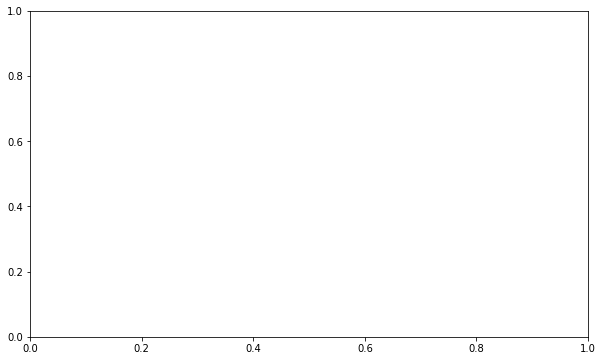

In [31]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [32]:
#Predecir con el modelo
#Y_pred = model.predict_classes(X)
#Y_prob = model.predict_proba(X)


Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_6/dense_12/MatMul' defined at (most recent call last):
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-32-96ec6822fb71>", line 6, in <module>
      Y_pred = model.predict(X_test)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 915, in __call__
      result = self._call(*args, **kwds)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 954, in _call
      results = self._stateful_fn(*args, **kwds)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/eager/function.py", line 2495, in __call__
      filtered_flat_args) = self._maybe_define_function(args, kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/eager/function.py", line 2760, in _maybe_define_function
      graph_function = self._create_graph_function(args, kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/eager/function.py", line 2670, in _create_graph_function
      func_graph_module.func_graph_from_py_func(
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py", line 1247, in func_graph_from_py_func
      func_outputs = python_func(*func_args, **func_kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 677, in wrapped_fn
      out = weak_wrapped_fn().__wrapped__(*args, **kwds)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py", line 1222, in autograph_handler
      return autograph.converted_call(
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py", line 1315, in run
      return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py", line 2891, in call_for_each_replica
      return self._call_for_each_replica(fn, args, kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py", line 3692, in _call_for_each_replica
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/training.py", line 1983, in predict_step
      return self(x, training=False)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/layers/core/dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py", line 1176, in op_dispatch_handler
      return dispatch_target(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/ops/math_ops.py", line 3714, in matmul
      return gen_math_ops.mat_mul(
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/ops/gen_math_ops.py", line 6034, in mat_mul
      _, _, _op, _outputs = _op_def_library._apply_op_helper(
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py", line 797, in _apply_op_helper
      op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py", line 735, in _create_op_internal
      return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3800, in _create_op_internal
      ret = Operation(
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 2108, in __init__
      c_op = _create_c_op(g, node_def, inputs, control_input_ops, op_def=op_def)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 1974, in _create_c_op
      tf_stack.extract_stack_for_op(c_op, stacklevel=3)
    File "/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/util/tf_stack.py", line 180, in extract_stack_for_op
      _tf_stack.extract_stack_for_op(
Node: 'sequential_6/dense_12/MatMul'
In[0] mismatch In[1] shape: 4 vs. 8: [30,4] [8,8] 0 0
	 [[{{node sequential_6/dense_12/MatMul}}]] [Op:__inference_predict_function_8060]

In [ ]:
Y_pred

In [ ]:
Y_prob

In [ ]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [ ]:
y_train

In [ ]:
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

In [ ]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))